<a href="https://colab.research.google.com/github/avanegasp/Arbnb_train/blob/main/Train_airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
train = pd.read_csv('https://raw.githubusercontent.com/avanegasp/Arbnb_train/main/train%202.csv')

In [23]:
train_2 = train.copy()

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [11]:
train.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [20]:
train.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [17]:
train.describe(include=['object'])

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
count,48879,48874,48895,48895,48895,38843
unique,47905,11452,5,221,3,1764
top,Hillside Hotel,Michael,Manhattan,Williamsburg,Entire home/apt,2019-06-23
freq,18,417,21661,3920,25409,1413


In [18]:
train_neighbourhood = train['neighbourhood_group'].unique()
train_neighbourhood

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [13]:
train.count()

id                                48895
name                              48879
host_id                           48895
host_name                         48874
neighbourhood_group               48895
neighbourhood                     48895
latitude                          48895
longitude                         48895
room_type                         48895
price                             48895
minimum_nights                    48895
number_of_reviews                 48895
last_review                       38843
reviews_per_month                 38843
calculated_host_listings_count    48895
availability_365                  48895
dtype: int64

In [27]:
train_delete = ['id', 'host_id', 'number_of_reviews', 'reviews_per_month', 'last_review']
train_delete

['id', 'host_id', 'number_of_reviews', 'reviews_per_month', 'last_review']

In [28]:
train = train.drop(train_delete, axis=1)

In [34]:
train_neighbourhood_group_sort = train['neighbourhood_group'].value_counts()
train_neighbourhood_group_sort

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [74]:
train.count()

name                              48879
host_name                         48874
neighbourhood_group               48895
neighbourhood                     48895
latitude                          48895
longitude                         48895
room_type                         48895
price                             48895
minimum_nights                    48895
calculated_host_listings_count    48895
availability_365                  48895
dtype: int64

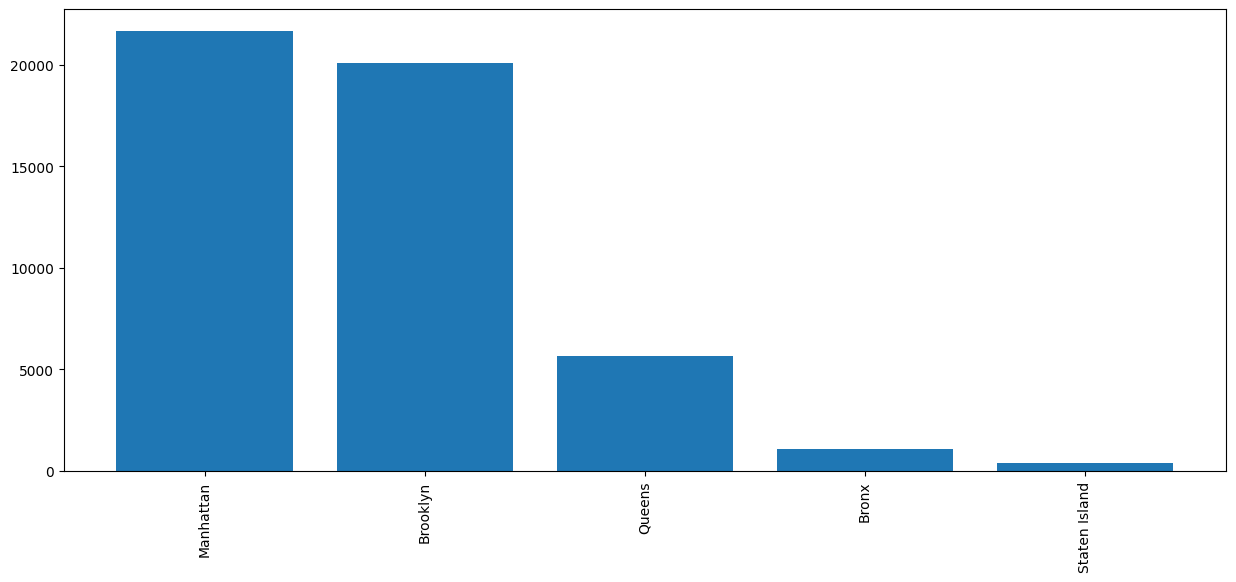

In [35]:
plt.figure(figsize=(15,6))
plt.bar(train_neighbourhood_group_sort.index, train_neighbourhood_group_sort.values)
plt.xticks(rotation=90)
plt.show()

In [36]:
train_neighbourhood_sort = train['neighbourhood'].value_counts()
train_neighbourhood_sort

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: neighbourhood, Length: 221, dtype: int64

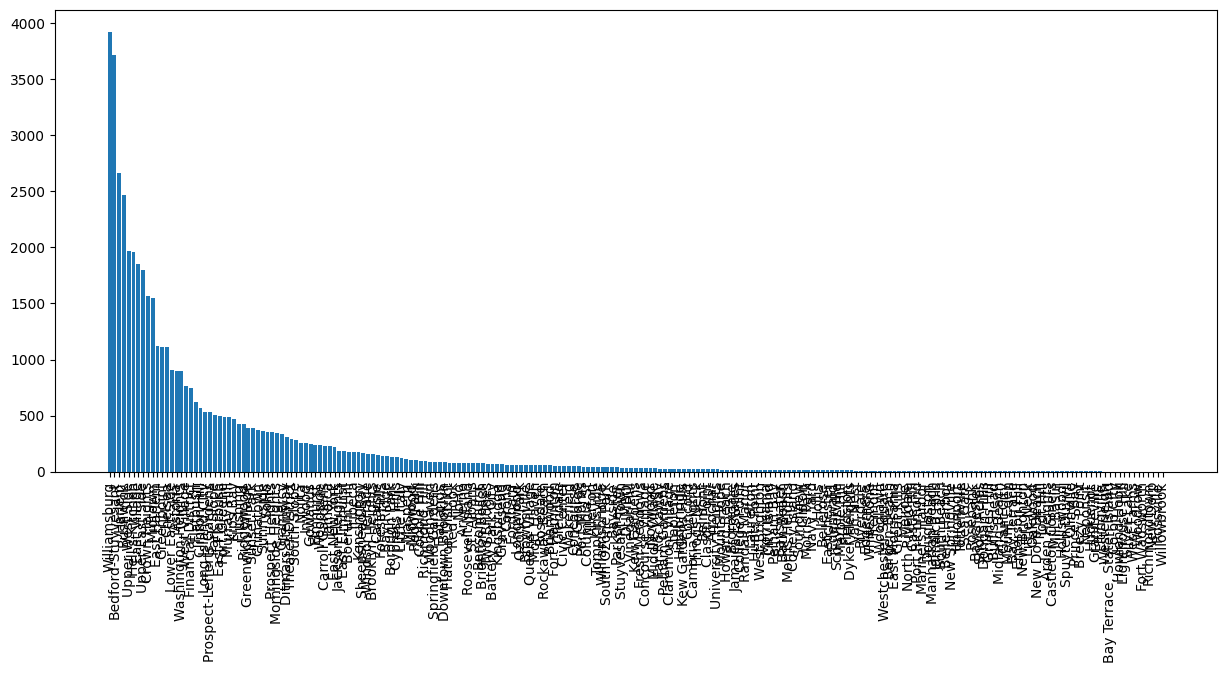

In [55]:
plt.figure(figsize=(15,6))
plt.bar(train_neighbourhood_sort.index, train_neighbourhood_sort.values)
plt.xticks(rotation=90)
plt.show()

In [63]:
# Sort the first to last
train_neighbourhood_sort = train['neighbourhood'].value_counts()

# The first 20 values
first_20 = train_neighbourhood_sort.head(20)
print("First 20 values:")
print(first_20)

First 20 values:
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
East Harlem           1117
Greenpoint            1115
Chelsea               1113
Lower East Side        911
Astoria                900
Washington Heights     899
West Village           768
Financial District     744
Flatbush               621
Clinton Hill           572
Name: neighbourhood, dtype: int64


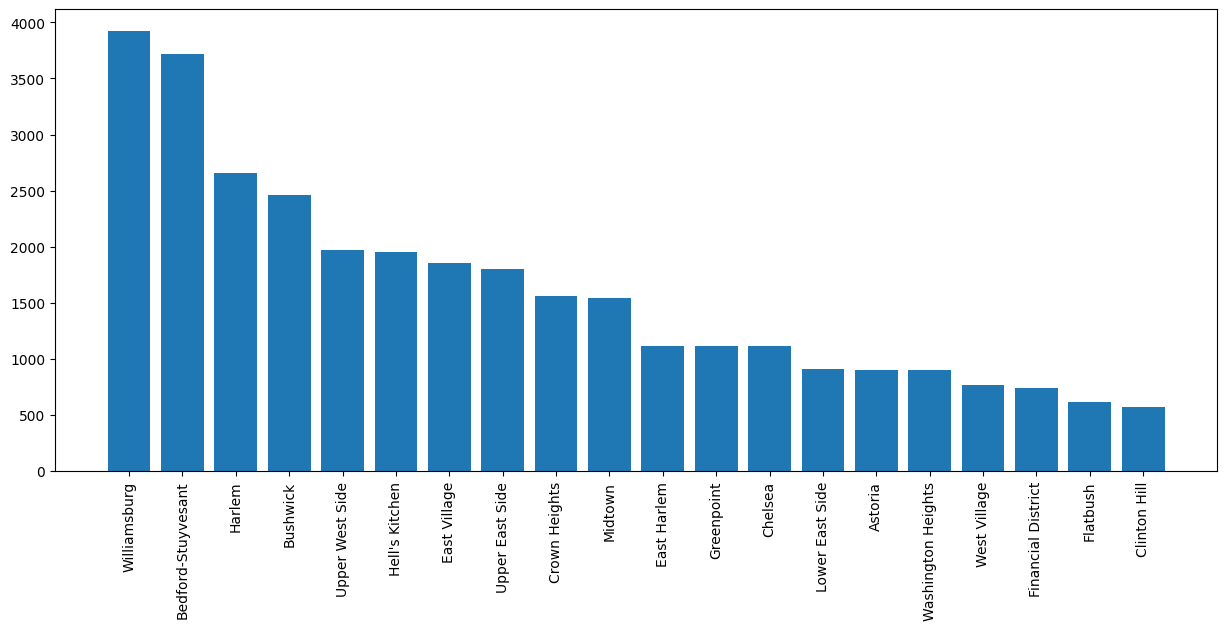

In [64]:
plt.figure(figsize=(15,6))
plt.bar(first_20.index, first_20.values)
plt.xticks(rotation=90)
plt.show()

In [68]:
train_neighbourhood_sort

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: neighbourhood, Length: 221, dtype: int64

In [72]:
# Obtener los últimos 30 valores
train_range = train_neighbourhood_sort.tail(210)

# Seleccionar el rango específico de los últimos 20 valores (por ejemplo, desde el 11 hasta el 30)
specific_range = train_range[100:130]

print("\n Specífic Range:")
print(specific_range)



 Specífic Range:
Fresh Meadows         32
Concourse Village     32
Norwood               31
Middle Village        31
Far Rockaway          29
Pelham Gardens        28
Claremont Village     28
Stapleton             27
Highbridge            27
Kew Gardens Hills     26
Concord               26
Cambria Heights       26
Throgs Neck           24
Belmont               24
Clason Point          21
Arrochar              21
University Heights    21
Mount Hope            20
Howard Beach          20
Bronxdale             19
Jamaica Estates       19
College Point         19
Randall Manor         19
Laurelton             18
Hunts Point           18
West Brighton         18
Morrisania            18
City Island           18
Pelham Bay            17
Bayswater             17
Name: neighbourhood, dtype: int64


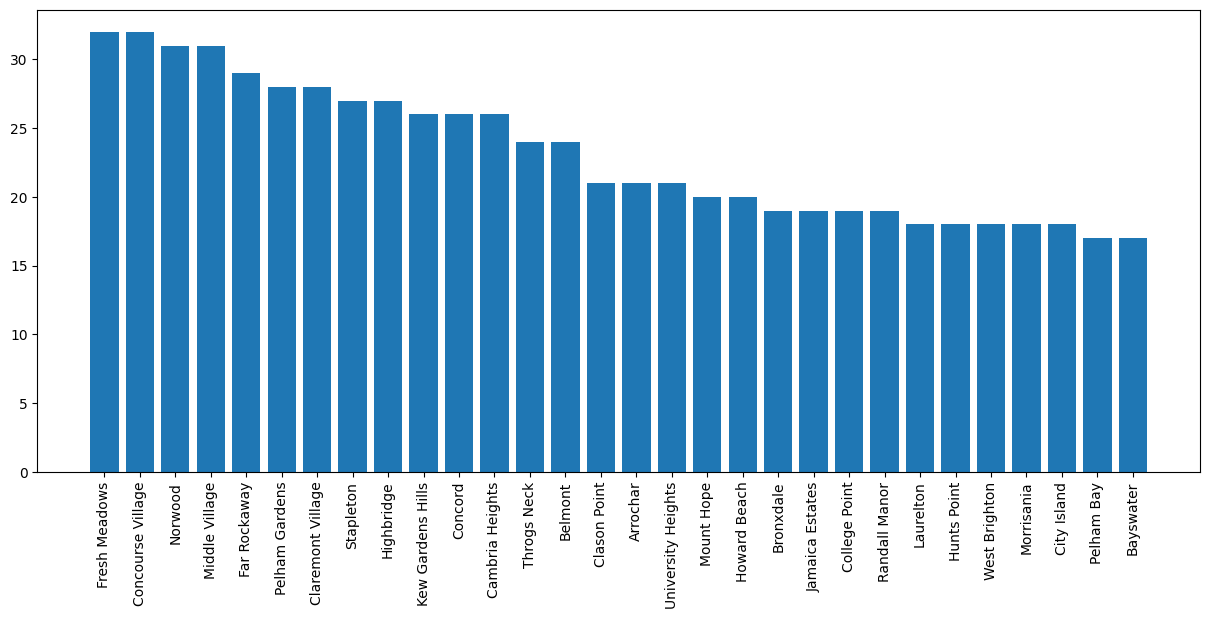

In [73]:
plt.figure(figsize=(15,6))
plt.bar(specific_range.index, specific_range.values)
plt.xticks(rotation=90)
plt.show()

In [65]:
# Last 20 values
last_20 = train_neighbourhood_sort.tail(30)
print("\nLast 20 values:")
print(last_20)


Last 20 values:
New Brighton                  5
Little Neck                   5
Oakwood                       5
New Dorp Beach                5
Todt Hill                     4
Arden Heights                 4
Castleton Corners             4
Mill Basin                    4
Holliswood                    4
Spuyten Duyvil                4
Olinville                     4
Prince's Bay                  4
Breezy Point                  3
Neponsit                      3
Huguenot                      3
Graniteville                  3
Eltingville                   3
Westerleigh                   2
Bay Terrace, Staten Island    2
Co-op City                    2
Howland Hook                  2
Lighthouse Hill               2
Silver Lake                   2
West Farms                    2
Woodrow                       1
Fort Wadsworth                1
Richmondtown                  1
New Dorp                      1
Rossville                     1
Willowbrook                   1
Name: neighbourhood, dt

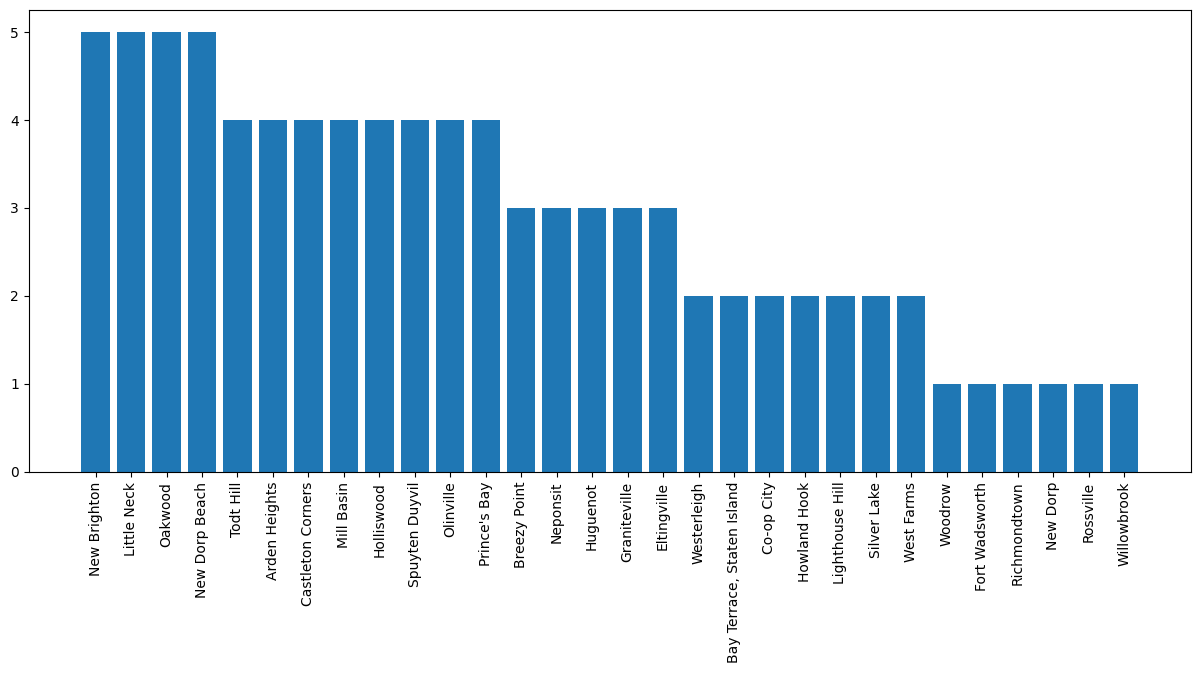

In [66]:
plt.figure(figsize=(15,6))
plt.bar(last_20.index, last_20.values)
plt.xticks(rotation=90)
plt.show()